# QSO Templates

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import fitsio

Read the template FITS file:

In [3]:
templates = fitsio.FITS('../simulate/QSOtemplate.fits', mode='r')

In [4]:
data = templates[1].read().view('>f8').reshape((40800,501))

In [5]:
wlen = data[:, 0]
flux = data[:, 1:].transpose()

Order templates by their mean flux:

In [6]:
mean_flux = np.mean(flux, axis=1)
increasing = np.argsort(mean_flux)
flux = flux[increasing]

Plot some sample templates:

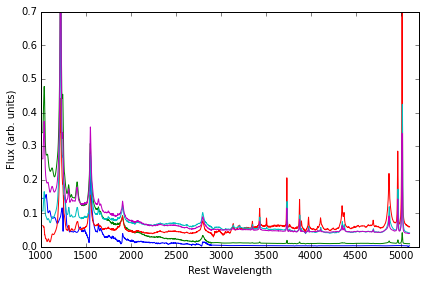

In [7]:
plt.plot(wlen, flux[0])
plt.plot(wlen, flux[50])
plt.plot(wlen, flux[100])
plt.plot(wlen, flux[150])
plt.plot(wlen, flux[200])
plt.xlim(1000., 5200.)
plt.ylim(0., 0.7)
plt.xlabel('Rest Wavelength')
plt.ylabel('Flux (arb. units)')
plt.tight_layout()
plt.savefig('templates1.png')

In [8]:
downsampled = np.mean(flux.reshape(500, 40800//50, 50), axis=-1)

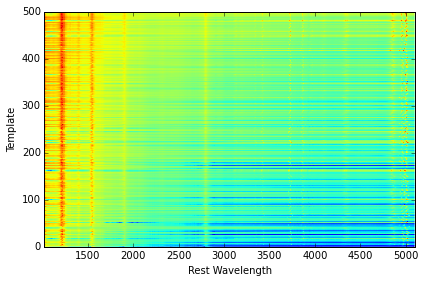

In [9]:
plt.imshow(np.log(downsampled), interpolation='None', origin='bottom', aspect='auto',
           extent=[wlen[0], wlen[-1], 0, 500])
plt.xlabel('Rest Wavelength')
plt.ylabel('Template')
plt.tight_layout()
plt.savefig('templates2.png')